<a href="https://colab.research.google.com/github/rgmantovani/advancedML/blob/master/codes/aula_06_ensembles/Ensembles_example_01_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso de Ensembles

Disciplina: Métodos e Modelos Avançados em Ciência de Dados

Especialização em Ciência de Dados - Universidade Tecnologica Federal do Paraná

**Aula 06:** Ensembles

**Exemplo 01:** Executando diferentes métodos de ensemble no dataset iris

by: Rafael G. Mantovani

---

In [ ]:
import pandas as pd               # manipulação de data frames no python
import numpy as np                # manipulação de numeros na notação científica
import matplotlib.pyplot as plt   # plots/gráficos

In [ ]:
# import dos datasets ja existentes no scikit-learn (iris)
from sklearn import datasets

# import das classes dos algoritmos de classificação
from sklearn.tree import DecisionTreeClassifier     # Arvore de decisao
from sklearn.neural_network import MLPClassifier    # MLP
from sklearn.neighbors import KNeighborsClassifier  #k-NN

# import das classes dos algoritmos de ensemble
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier 

# import das metodologias de experientação
from sklearn.model_selection import train_test_split # holdout
from sklearn.metrics import accuracy_score           # acurácia

In [ ]:
# seed para reprodução dos experimentos
seed = 10
#seed = 42

In [ ]:
# vendo como são nossos atributos descritivos
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# vendo agora o dataset com o target (label)
Y = pd.DataFrame(iris.target)
full_df = df.join(Y)
full_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


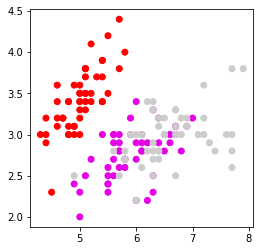

In [ ]:
# Nesse exemplo/tutorial, iremos apenas usar as duas primeiras features do iris
# assim, conseguimos gerar as superfícies de decisão e plotar em 2 dimensões 
X = df.iloc[:, [0,1]]
X.head()

# cores customizadas
color_map_samples = {0: (1, 0, 0), 1: (.9, 0, .9), 2: (.8, .8, .8)} 
colors = [color_map_samples[c] for c in Y.values.ravel()]

# scatter plot - vendo nosso problema em 2 dimensões
plt.figure(figsize=(4, 4))
plt.scatter( X.values[:,0],  X.values[:,1], c = colors)
plt.show()

In [ ]:
# Separar os conjuntos de treino e teste
# - usaremos holdout
# - 2/3 dos exemplos compõem o conjunto de treinamento
# - 1/3 dos exemplos compõem o conjunto de teste
# a amostragem é estratificada (stratify)

[X_train, X_test, y_train, y_test] = train_test_split(X, Y, test_size=0.34, stratify=Y, random_state=seed)
print("*** Dimensões dos conjuntos de dados ***")
print("- (X_train) Conjunto de treinamento:\t\t", X_train.shape)
print("- (y_train) Rótulos do conjunto de treinamento:\t", y_train.shape)
print("- (X_test) Conjunto de teste:\t\t\t", X_test.shape)
print("- (y_test) Rótulos do conjunto de teste:\t",y_test.shape)


*** Dimensões dos conjuntos de dados ***
- (X_train) Conjunto de treinamento:		 (98, 2)
- (y_train) Rótulos do conjunto de treinamento:	 (98, 1)
- (X_test) Conjunto de teste:			 (52, 2)
- (y_test) Rótulos do conjunto de teste:	 (52, 1)


In [ ]:
# dando uma olhada no conjunto de treinamento amostrado (2 features)
train = X_train.join(y_train)
train.head()

,sepal length (cm),sepal width (cm),0
106,4.9,2.5,2
75,6.6,3.0,1
80,5.5,2.4,1
43,5.0,3.5,0
139,6.9,3.1,2


In [ ]:
# Dando uma olhada no conjunto de teste (só conferindo os dados)
test = X_test.join(y_test)
test.head()

,sepal length (cm),sepal width (cm),0
148,6.2,3.4,2
84,5.4,3.0,1
126,6.2,2.8,2
55,5.7,2.8,1
117,7.7,3.8,2


In [ ]:
# Função para plotar a superfície de decisão de um classificador
# O código é baseado em:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

def plot_decision_boundary(classifier, X, y, title):
  xmin, xmax = np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05 
  ymin, ymax = np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05 
  step = 0.01
  
  xx, yy = np.meshgrid(np.arange(xmin, xmax, step), np.arange(ymin, ymax, step))

  Z = classifier.predict(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
  Z = Z.reshape(xx.shape) 
  
  #colormap = plt.cm.Paired
  colormap = plt.cm.Set1  
  plt.contourf(xx, yy, Z, cmap=colormap)
  
  #color_map_samples = {0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}
  color_map_samples = {0: (1, 0, 0), 1: (.9, 0, .9), 2: (.8, .8, .8)} 
  colors = [color_map_samples[c] for c in y]
  plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')
  
  plt.xlim(xmin, xmax) 
  plt.ylim(ymin, ymax)
  
  plt.title(title)

In [ ]:
# Convertendo os conjuntos de pandas para numpy array (facilitar os plots)
y_train_values = y_train.values.ravel().astype(int)
x_train_values = X_train.values

---
#1. Criando um Voting

In [ ]:
# Induzindo uma Árvore de Decisão (Decision Tree)
tree = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=3, random_state=seed) 
tree.fit(X_train, y_train_values)

# Induzindo uma Árvore uma MLP (Multilayer Perceptron)
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, random_state=seed) 
mlp.fit(X_train, y_train_values)

# Induzindo um kNN (k Nearest Neighbors)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train_values)

# Induzindo um ensemble (Voting) composto pelos três modelos induzidos acima
voting_clf = VotingClassifier(estimators=[('Tree', tree), ('MLP', mlp), ('kNN', knn)], voting='hard') 
voting_clf.fit(X_train, y_train_values)

VotingClassifier(estimators=[('Tree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=3,
                                                     min_samples_split=5,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=10,
   

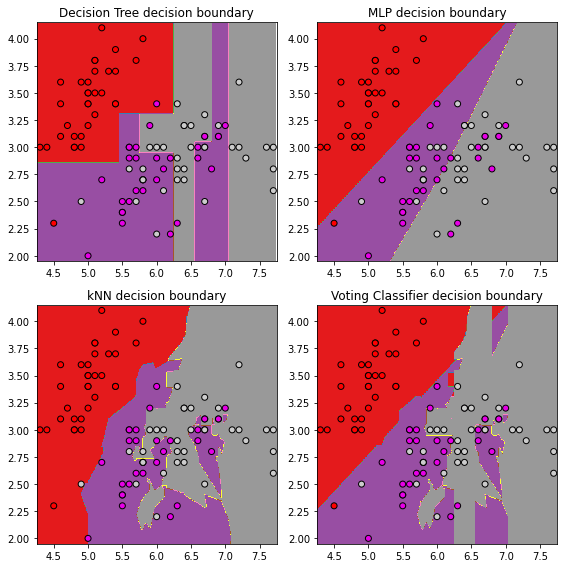

In [ ]:
# Vendo a superfície de decisão de todos os modelos treinados
# no conjunto de treinamento
plt.figure(figsize=(8, 8))

# DT subplot
plt.subplot(2, 2, 1)
plot_decision_boundary(tree, x_train_values, y_train_values, 'Decision Tree decision boundary')

# MLP subplot
plt.subplot(2, 2, 2)
plot_decision_boundary(mlp, x_train_values, y_train_values, 'MLP decision boundary')

# kNN subplot
plt.subplot(2, 2, 3)
plot_decision_boundary(knn, x_train_values, y_train_values, 'kNN decision boundary')

# Voting subplot
plt.subplot(2, 2, 4)
plot_decision_boundary(voting_clf, x_train_values, y_train_values, 'Voting Classifier decision boundary')

plt.tight_layout() 
plt.show()

---
#1. Criando um Bagging

In [ ]:
# Criando um Bagging com 50 arvores de decisão
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=50, random_state=seed) 
# treinando o modelo
bagging_clf.fit(x_train_values, y_train_values)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=3,
                                                        min_samples_split=5,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=10,
  

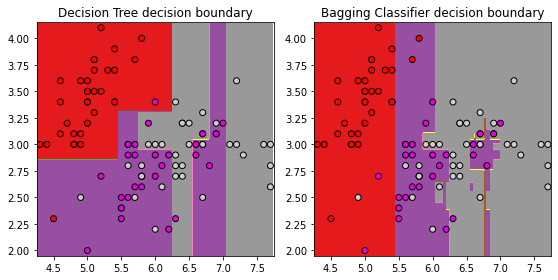

In [ ]:
# Superficie de decisão dos modelos (DT x Bagging)
plt.figure(figsize=(8, 4))

# DT subplot
plt.subplot(1, 2, 1)
plot_decision_boundary(tree, x_train_values, y_train_values, 'Decision Tree decision boundary')

#Bagging subplot
plt.subplot(1, 2, 2)
plot_decision_boundary(bagging_clf, x_train_values, y_train_values, 'Bagging Classifier decision boundary')

plt.tight_layout() 
plt.show()

---
#3. Criando um Boosting

In [ ]:
# criando um boosting com 50 árvores (default)
boosting_clf = AdaBoostClassifier(n_estimators=50,random_state=seed) 
boosting_clf.fit(x_train_values, y_train_values)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=10)

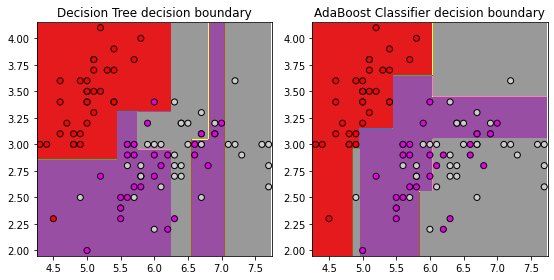

In [ ]:
# Superficie de decisão dos modelos (DT x AdaBoost)
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_decision_boundary(tree, x_train_values, y_train_values, 'Decision Tree decision boundary')

plt.subplot(1, 2, 2)
plot_decision_boundary(boosting_clf, x_train_values, y_train_values, 'AdaBoost Classifier decision boundary')

plt.tight_layout() 
plt.show()

---
#4 - Criando um Random Forest

In [ ]:
# criando um RF com 50 arvores e treinando o modelo
random_forest_clf = RandomForestClassifier(n_estimators=50, random_state=seed) 
random_forest_clf.fit(x_train_values, y_train_values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

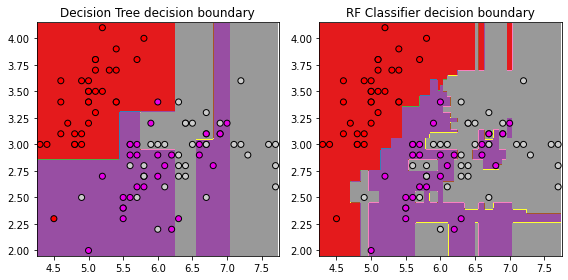

In [ ]:
# Superficie de decisão dos modelos (DT x RF)
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_decision_boundary(tree, x_train_values, y_train_values, 'Decision Tree decision boundary')

plt.subplot(1, 2, 2)
plot_decision_boundary(random_forest_clf, x_train_values, y_train_values, 'RF Classifier decision boundary')

plt.tight_layout() 
plt.show()

---
#5 - Comparando todos os modelos

In [ ]:
# DT predictions
y_test_pred_tree = tree.predict(X_test)
tree_acc = accuracy_score(y_test.values, y_test_pred_tree)

# MLP predictions
y_test_pred_mlp = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test.values, y_test_pred_mlp)

# kNN predictions
y_test_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test.values, y_test_pred_knn)

# Voting predictions
y_test_pred_voting = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test.values, y_test_pred_voting)

# Bagging predictions
y_test_pred_bagging = bagging_clf.predict(X_test)
bagging_acc = accuracy_score(y_test.values, y_test_pred_bagging)

# Boosting predictions
y_test_pred_boosting = boosting_clf.predict(X_test)
boosting_acc = accuracy_score(y_test.values, y_test_pred_boosting)

# RandomForest predictions
y_test_pred_rf = random_forest_clf.predict(X_test)
rf_acc = accuracy_score(y_test.values, y_test_pred_rf)

print("*** Desempenho dos algoritmos no conjunto de teste *** ")
print("DT = \t ", round(tree_acc, 3))
print("MLP = \t ", round(mlp_acc, 3))
print("kNN = \t ", round(knn_acc, 3))
print("Voting = ", round(voting_acc, 3))
print("Bagging =", round(bagging_acc, 3))
print("Boosting=", round(boosting_acc, 3))
print("RF = \t ",  round(rf_acc, 3))

*** Desempenho dos algoritmos *** 
DT = 	  0.731
MLP = 	  0.846
kNN = 	  0.692
Voting =  0.788
Bagging = 0.673
Boosting= 0.654
RF = 	  0.712


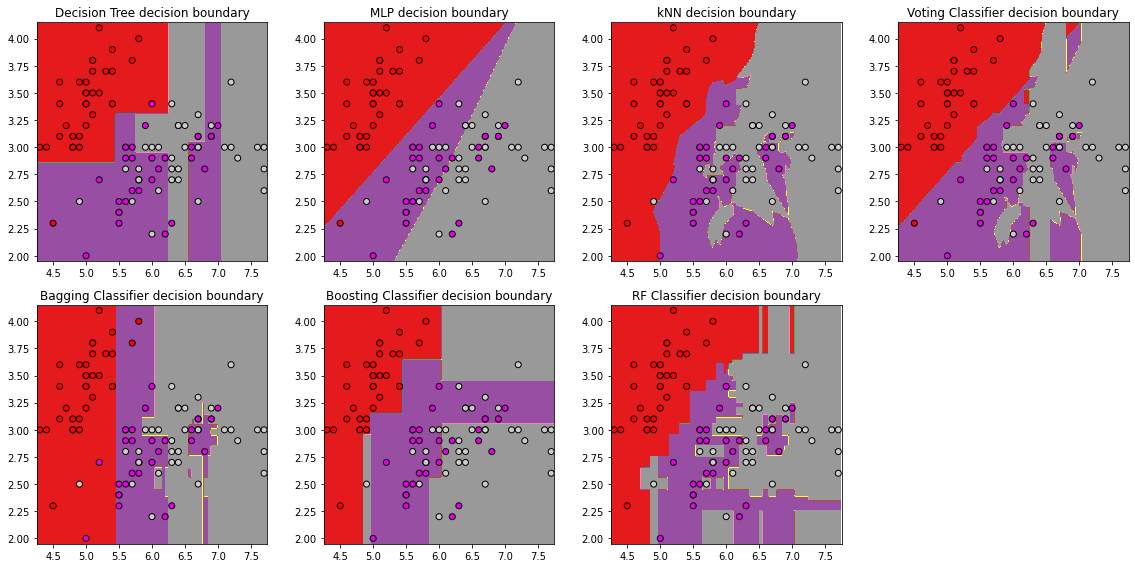

In [ ]:
plt.figure(figsize=(16, 8))

# DT subplot
plt.subplot(2, 4, 1)
plot_decision_boundary(tree, x_train_values, y_train_values, 'Decision Tree decision boundary')

# MLP subplot
plt.subplot(2, 4, 2)
plot_decision_boundary(mlp, x_train_values, y_train_values, 'MLP decision boundary')

# kNN subplot
plt.subplot(2, 4, 3)
plot_decision_boundary(knn, x_train_values, y_train_values, 'kNN decision boundary')

# Voting subplot
plt.subplot(2, 4, 4)
plot_decision_boundary(voting_clf, x_train_values, y_train_values, 'Voting Classifier decision boundary')

# bagging subplot
plt.subplot(2, 4, 5)
plot_decision_boundary(bagging_clf, x_train_values, y_train_values, 'Bagging Classifier decision boundary')

# boosting subplot
plt.subplot(2, 4, 6)
plot_decision_boundary(boosting_clf, x_train_values, y_train_values, 'Boosting Classifier decision boundary')

# random forest subplot
plt.subplot(2, 4, 7)
plot_decision_boundary(random_forest_clf, x_train_values, y_train_values, 'RF Classifier decision boundary')

plt.tight_layout() 
plt.show()